# Sentiment analysis on Ukraine war live tweets

Install and Import all necessary libraries which are required to process

In [1]:
!pip install wordcloud
!pip3 install nltk
!pip install emot

# Natural Language Processing (NLP)

NLP provides insights to machine to understand human language by extracting meaning from text. NLTK (Natural Language Toolkit) is the library that provides algorithms for NLP. 

Utilities and Plotting libraries already explained while extracting Tweets from Twitter. In this notebook, I will emphasize on NLTK data processing methods for cleaning the unstructured text to predict information.

Scikit-learn library has also been imported for feature extraction, modelling and evaluating the performance by performance metrics. 

Emot library has been imported to extract the emoji and emoticons from a text. 

In [2]:
# utilities
import re
import numpy as np
import pandas as pd
import string # Inbuilt sting library

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image 

# nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords # get stopwords from NLTK library

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS

# Read and Load the Dataset

Defining column headers as raw dataset does not consists of column headers

In [3]:
# Importing the dataset
DATASET_COLUMNS=['tweet_id','created_at','text','location','retweet','favourite','Sentiment']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv(r"C:\Users\nehak\Desktop\AI\SEntiment\Assignment submission\UkraineWarTweets_from_Twitter.csv", encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,tweet_id,created_at,text,location,retweet,favourite,Sentiment
4671,1.520000e+18,2022-04-24 11:36:32+00:00,'#Turkey-based groups say Ramzan Kadyrov does ...,NaN,0,0,Negative
1314,1.520000e+18,2022-04-24 15:46:48+00:00,"What an excellent, heart breaking article. We ...",NaN,0,2,Positive
3054,1.520000e+18,2022-04-24 13:42:17+00:00,What a hero! ðð½ðð\n\nBBC News - Da...,"Birkenhead, England",0,0,Positive
624,1.520000e+18,2022-04-24 16:38:39+00:00,Russia-Ukraine war: UN calls for âimmediate ...,USA,0,0,Negative
7065,1.520000e+18,2022-05-03 21:03:56+00:00,It would be ihnteresting bto hear @KonstantinK...,NaN,0,0,Neutral


# Exploratory Data Analysis

Checking the raw data characteristics such as datatype, length of dataset, shape, columns, and labels. 

As live tweets were downloaded spontaneously from Twitter so labeling was done. Sentimentswere defined manually for all 10,000 records. 

In [4]:
df.head()

,tweet_id,created_at,text,location,retweet,favourite,Sentiment
0,1.520000e+18,2022-04-24 17:25:14+00:00,David Nott: The war surgeon helping doctors sa...,"London, England",0,0,Positive
1,1.520000e+18,2022-04-24 17:25:06+00:00,"In comments sections, in social media, even in...",New York City,0,2,Positive
2,1.520000e+18,2022-04-24 17:25:05+00:00,"With Us or With Them? In a New Cold War, How A...","Delaware, USA",0,0,Negative
3,1.520000e+18,2022-04-24 17:25:04+00:00,Great essay by â¦@TimothyDSnyderâ© on the ne...,"Washington, DC",0,0,Positive
4,1.520000e+18,2022-04-24 17:25:03+00:00,Germany prepares already for a good cooperatio...,NaN,0,0,Negative


In [5]:
df.columns

Index(['tweet_id', 'created_at', 'text', 'location', 'retweet', 'favourite',
       'Sentiment'],
      dtype='object')

In [6]:
df.groupby(['Sentiment'])['text'].count()

Sentiment
Negative    7615
Neutral      781
Positive    1604
Name: text, dtype: int64

In [7]:
print('length of data is',len(df))

length of data is 10000


In [8]:
df.shape

(10000, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    10000 non-null  float64
 1   created_at  10000 non-null  object 
 2   text        10000 non-null  object 
 3   location    7001 non-null   object 
 4   retweet     10000 non-null  int64  
 5   favourite   10000 non-null  int64  
 6   Sentiment   10000 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 547.0+ KB


In [10]:
df.dtypes

tweet_id      float64
created_at     object
text           object
location       object
retweet         int64
favourite       int64
Sentiment      object
dtype: object

In [11]:
print('Count of columns in the data is: ',len(df.columns))
print('Count of rows in the data is: ',len(df))

Count of columns in the data is:  7
Count of rows in the data is:  10000


In [12]:
df['Sentiment'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [13]:
df.groupby('Sentiment')['text'].count().sort_values(ascending=False)

Sentiment
Negative    7615
Positive    1604
Neutral      781
Name: text, dtype: int64

Plotted dataset in bar chart format before start with data pre-processing steps in order to see what is the ratio of each sentiment. Seaborn and pandas library has been used over here to plot bar graph.

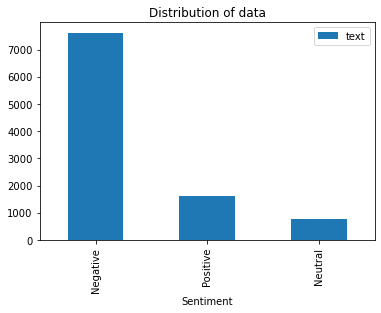

In [14]:
# Plotting the distribution for dataset.
ax = df.groupby('Sentiment')['text'].count().sort_values(ascending=False).plot(kind='bar', title='Distribution of data',legend=True)

# Storing data in lists.
text, sentiment = list(df['text']), list(df['Sentiment'])

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

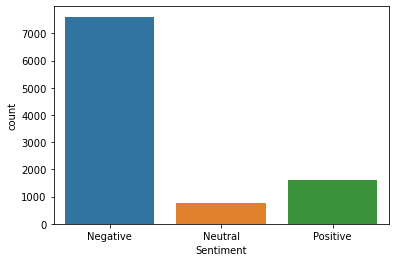

In [15]:
import seaborn as sns
sns.countplot(x='Sentiment', data=df.sort_values(by='Sentiment', ascending=True))

# Data Pre-processing

Before to begin with data pre-processing steps, dataset got organised and put that in sequence of Positive, Negative and Neutral categories. 

In [16]:
data = df[['text','Sentiment']]

In [17]:
data_pos = data[data['Sentiment'] == 'Positive']
data_neg = data[data['Sentiment'] == 'Negative']
data_neu = data[data['Sentiment'] == 'Neutral']

In [18]:
dataset = pd.concat([data_pos,data_neg,data_neu])

Stopwords are the commonly used words which needs to be ignored as these will occupy extra space in the database. As the dataset consists of lot of unwanted strange alphabets so common_words variable got created to manually define which all words needs to be removed. 
string.ascii_lowercase will give lowercase letters.


In [19]:
stop_words = list(stopwords.words('english'))
user_stop_words = ['2020', '2021','year', 'many', 'much', 'amp', 'next', 'cant', 'wont', 'hadnt','havent', 'hasnt', 
                   'isnt', 'shouldnt', 'couldnt', 'wasnt', 'werent','mustnt', '’', '...', '..', '.', '.....', '....', 
                   'been…','aht', 've', 'next',"i'll","we'll","they'll","you'll","she'll","he'll","'ll","n't",
                   "'s",'anyone','today','yesterday','day', 'already']

# The list below are common words which will not be relevant in our analysis.
common_words = ['ukraine','war','russia', 'ukraineð', 'ð','â', 'â€', 'ðŸ‡·ðŸ‡ºðŸ‡ºðŸ‡¦', 'https://', 'Ñ€Ð°ÑˆÐ¸Ð·Ð¼', 'Â´','ðŸ‡³','https', 't.co','â']
alphabets = list(string.ascii_lowercase)
stop_words = stop_words + user_stop_words + alphabets + common_words
emojis = list(UNICODE_EMOJI.keys())

Data pre-processing consists of below steps:

    a) Change the Lowercase  the words in the text
    b) Remove URLs
    c) Tokenize the words
    d) Remove stopwords
    e) Remove emojis
    f) Remove punctuations
    g) Lemmatizing the words
    
preprocessTweets() function got defined where we have taken above mentioned steps to remove the noise from tweets.

In [20]:
# Function to remove stop words, punctuations, emojis and return words to their base form using Lemmatizer
def preprocessTweets(tweet):
    tweet = tweet.lower()  # changes all words to lower case
    
    # Remove urls
    tweet = re.sub(r"http/S+|www/S+|https/S+", '', tweet, flags = re.MULTILINE)
    
    #Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#\w+|\d+', '', tweet)
    
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)  # convert string to tokens
    filtered_words = [w for w in tweet_tokens if w not in stop_words]
    filtered_words = [w for w in filtered_words if w not in emojis]
    
    # Remove punctuations
    unpunctuated_words = [w for w in filtered_words if w not in string.punctuation]
    
    # Lemmatizing words
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(w) for w in unpunctuated_words]
    return " ".join(lemma_words)

Applying preprocessTweets() function to Tweet column in the dataset to generate clean tweets under new column Processed Tweets and shuffle the data in order to plot WordCloud

In [21]:
# Apply preProcessTweets function to the 'Tweet' column to generate a new column called 'Processed Tweets'.
dataset['Processed_Tweets'] = dataset['text'].apply(preprocessTweets)
dataset.head()

,text,Sentiment,Processed_Tweets
0,David Nott: The war surgeon helping doctors sa...,Positive,david nott surgeon helping doctor save life //...
1,"In comments sections, in social media, even in...",Positive,comment section social medium even official pr...
3,Great essay by â¦@TimothyDSnyderâ© on the ne...,Positive,great essay â¦© new word ñð°ñð¸ð·ð¼ rusism...
6,Hooray! Parliaments of Latvia and Lithuania ha...,Positive,hooray parliament latvia lithuania spoken appr...
10,Is Biden escalating and prolonging his war in ...,Positive,biden escalating prolonging try help democrat ...


In [22]:
dataset.reset_index(drop=True, inplace=True)

In [23]:
dataset = dataset[['text', 'Processed_Tweets', 'Sentiment']]

In [24]:
dataset.head(5)

,text,Processed_Tweets,Sentiment
0,David Nott: The war surgeon helping doctors sa...,david nott surgeon helping doctor save life //...,Positive
1,"In comments sections, in social media, even in...",comment section social medium even official pr...,Positive
2,Great essay by â¦@TimothyDSnyderâ© on the ne...,great essay â¦© new word ñð°ñð¸ð·ð¼ rusism...,Positive
3,Hooray! Parliaments of Latvia and Lithuania ha...,hooray parliament latvia lithuania spoken appr...,Positive
4,Is Biden escalating and prolonging his war in ...,biden escalating prolonging try help democrat ...,Positive


Plot a cloud of words for Positive tweets

In [25]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = dataset['Processed_Tweets'].tolist()
tweets_long_string = " ".join(tweets_long_string)

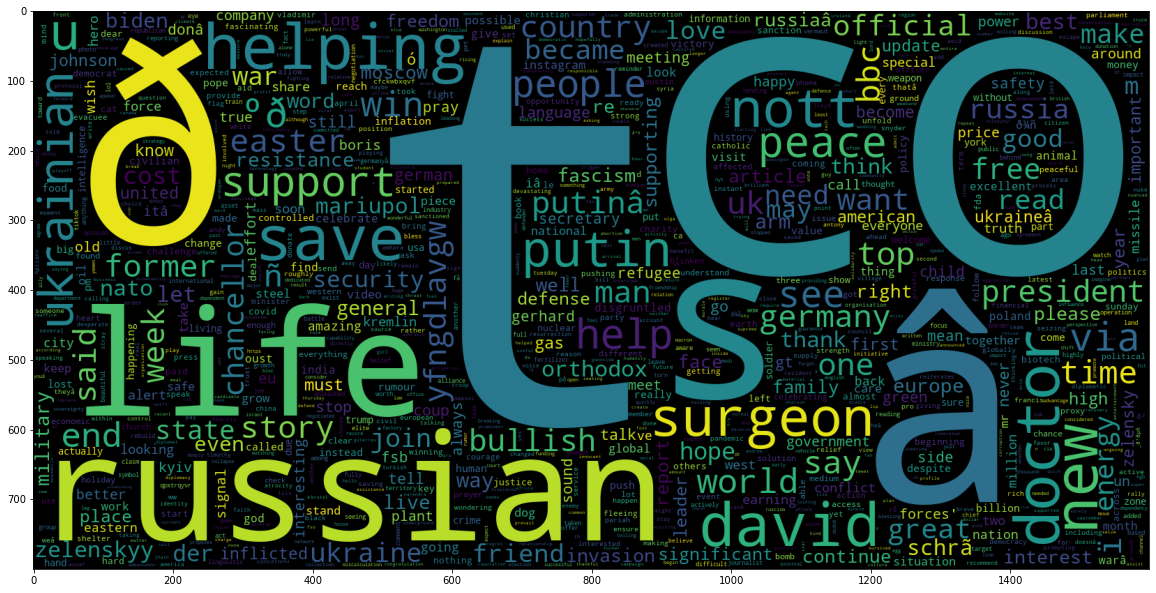

In [26]:
data_pos = dataset['Processed_Tweets'][:1326]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

Plot a cloud of words for Negative words

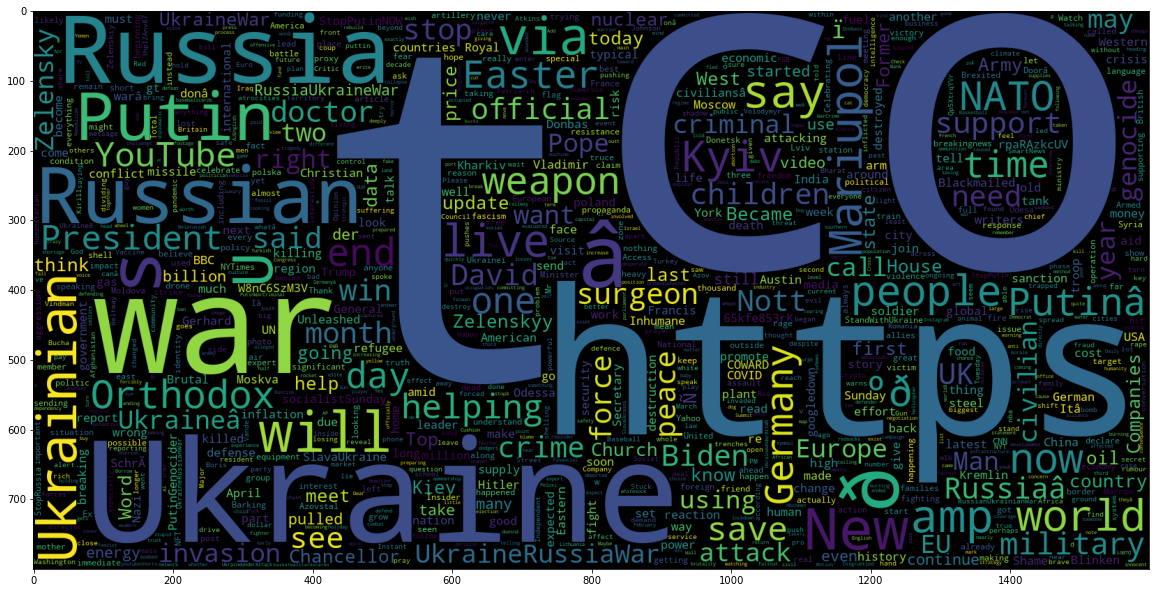

In [27]:
data_neg = data['text'][1327:6010]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_neg))
plt.figure(figsize = (20,20))
plt.imshow(wc)

Plot a cloud of words for Neutral words

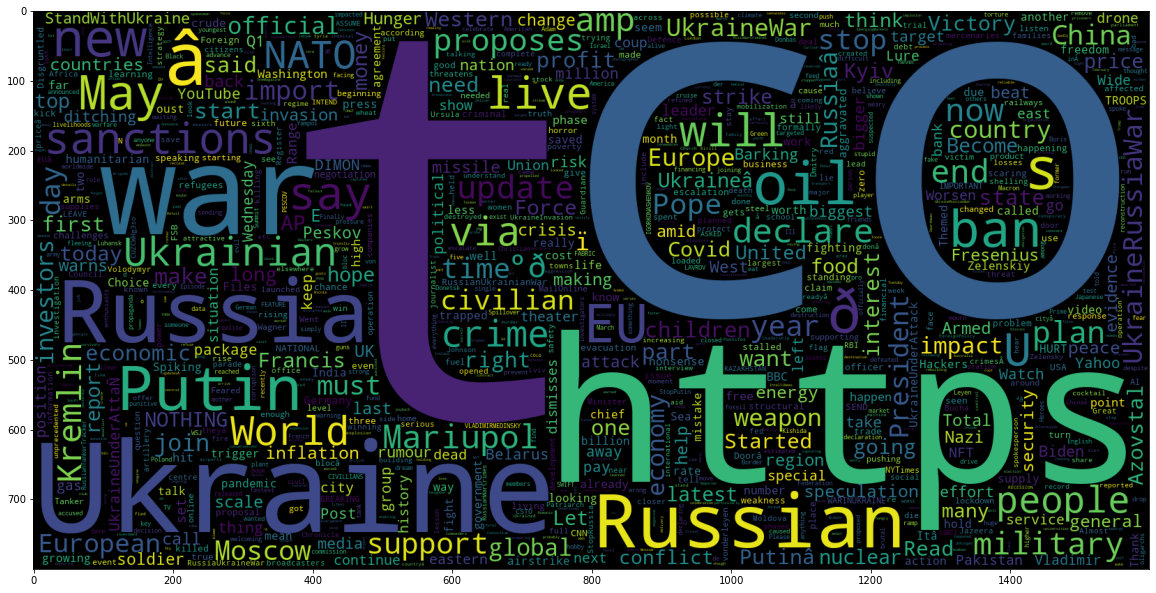

In [28]:
data_neu = data['text'][-665:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_neu))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [29]:
df = dataset.copy()
df.head()

,text,Processed_Tweets,Sentiment
0,David Nott: The war surgeon helping doctors sa...,david nott surgeon helping doctor save life //...,Positive
1,"In comments sections, in social media, even in...",comment section social medium even official pr...,Positive
2,Great essay by â¦@TimothyDSnyderâ© on the ne...,great essay â¦© new word ñð°ñð¸ð·ð¼ rusism...,Positive
3,Hooray! Parliaments of Latvia and Lithuania ha...,hooray parliament latvia lithuania spoken appr...,Positive
4,Is Biden escalating and prolonging his war in ...,biden escalating prolonging try help democrat ...,Positive


In [30]:
df = df.sample(frac=1).reset_index(drop=True)

In [31]:
df.head(10)

,text,Processed_Tweets,Sentiment
0,"In Bucha, Ukrainian families mourn the war's y...",bucha ukrainian family mourn youngest victim /...,Negative
1,Brexited = Blackmailed: criminals using data p...,brexited blackmailed criminal using data pulle...,Negative
2,US Pentagon: No third country did help Russia ...,u pentagon third country help //t.co/eoeqqbtypb,Negative
3,HAPPY ORTHODOX EASTER to all celebrating acros...,happy orthodox easter celebrating across aroun...,Positive
4,Boris shows the way G7 nations can persuade Mo...,boris show way nation persuade modi curb russi...,Neutral
5,Russian military is now storming Mariupol stee...,russian military storming mariupol steel facto...,Neutral
6,Ukraine war: Celebrating Easter in the trenche...,celebrating easter trench outside kyiv //t.co/...,Negative
7,How many U.S. legislators could be described w...,u.s. legislator could described sentence `` ex...,Positive
8,Windfall profits for North Sea oil &amp; gas c...,windfall profit north sea oil gas company esse...,Negative
9,Russia-Ukraine war: UN calls for âimmediate ...,russia-ukraine un call âimmediate stopâ ma...,Negative


Splitting our data into Train and Test subsets where X is the data and y is the label.

In [32]:
# Separating the 80% data for training data and 20% for testing data

X = df['Processed_Tweets']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42, shuffle=True)

TF-IDF stands for Term Frequency Inverse Document Frequency which transforms the text into meaningful representation of number in order to fit machine learning algorithm for prediction. 

Transforming Dataset using TF-IDF Vectorizer which converts the collection of raw data to a matrix

TfidVectoriser got defined with two parameters: 'ngram_range' is set to (1,2) which means unigrams and biograms which is the upper and lower range of n values for different n grams to be extracted. 'max_features' which will build a vocabulary that only consider the top max_features ordered by term frequency.

fit() function will learn the ngrams and split into ngrams.

get_feature_names() function will output the list in which ngrams appear according to column position of each feature.

In [33]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  91502


C:\Users\nehak\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


transform() will put ngrams into a phrase x ngram matrix

In [34]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

model_Evaluate() function is getting defined to predict the model and see the performance of each model using heatmap where categories got defined 

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Positive','Negative','Neutral']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=True, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Three different models got used to predict sentiments and evaluate which model performs the best comparatively among the three. 

Bernoulli Naive Bayes, 
SVM (Support Vector Machine),
Logistic Regression.

In [36]:
X_test.shape

(2000, 91502)

C:\Users\nehak\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nehak\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nehak\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Negative       0.78      1.00      0.88      1532
     Neutral       0.00      0.00      0.00       140
    Positive       0.96      0.13      0.23       328

    accuracy                           0.79      2000
   macro avg       0.58      0.38      0.37      2000
weighted avg       0.76      0.79      0.71      2000



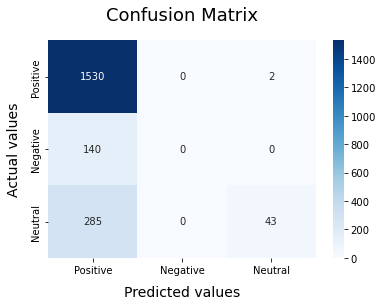

In [37]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

    Negative       0.87      0.97      0.92      1532
     Neutral       0.76      0.36      0.49       140
    Positive       0.84      0.57      0.68       328

    accuracy                           0.87      2000
   macro avg       0.82      0.63      0.70      2000
weighted avg       0.86      0.87      0.85      2000



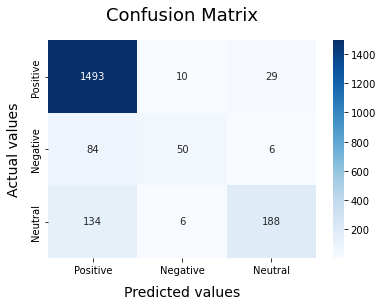

In [38]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

    Negative       0.85      0.99      0.91      1532
     Neutral       0.88      0.26      0.41       140
    Positive       0.90      0.46      0.61       328

    accuracy                           0.85      2000
   macro avg       0.88      0.57      0.64      2000
weighted avg       0.86      0.85      0.83      2000



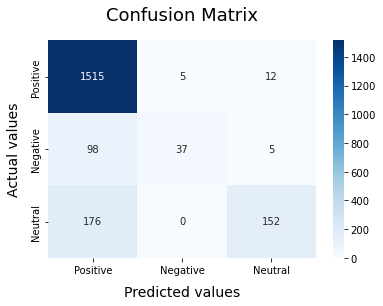

In [39]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)